# Machine learning from scratch

# Google colab setup

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
!ls "/content/drive/My Drive/"
!pip install keras

We can use the following built-in magic commands : 

*   `!wget [url] -P [depository]`  to download a file
*   `!python3 [file]`   to run a file



faire une fonction pour automatiser le processsus

```
model.save('keras.h5')
!pip install tensorflowjs 
!mkdir model
!tensorflowjs_converter --input_format keras keras.h5 model/
!zip -r model.zip model
from google.colab import files
files.download('model.zip')
```



# First examples

## MNIST dataset

Choose a category for an image

Loading dataset

In [ ]:
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [ ]:
train_images.shape

(60000, 28, 28)

Build the network

In [ ]:
from keras import models, layers

network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28*28,)))
network.add(layers.Dense(10, activation='softmax'))

Compliation step


In [ ]:
network.compile(optimizer='rmsprop', 
                loss='categorical_crossentropy', 
                metrics=['accuracy'])

Resize the data


In [ ]:
train_images = train_images.reshape(60000, 28*28)
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape(10000, 28*28)
test_images = test_images.astype('float32') / 255

Prepare labels

In [ ]:
from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

Training the network

In [ ]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 1s 3ms/step - loss: 0.2583 - accuracy: 0.9250
Epoch 2/5
469/469 [==============================] - 1s 3ms/step - loss: 0.1033 - accuracy: 0.9693
Epoch 3/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0680 - accuracy: 0.9796
Epoch 4/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0499 - accuracy: 0.9849
Epoch 5/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0373 - accuracy: 0.9891


Testing our network

In [ ]:
test_loss, test_acc = network.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.0671 - accuracy: 0.9800


## IMDB dataset


Classify reviews in a binary category (positive or negative)

Load dataset


In [ ]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17465344/17464789 [==============================] - 0s 0us/step


The data set is composed of most-used words in video reviews converted to indices of a dictionnary. The label one's is composed of binary answers, 0 for negative and 1 for positive.

In [ ]:
train_data.shape

(25000,)

In [ ]:
max([max(sentence) for sentence in train_data])

9999

A methode that decode reviews

In [ ]:
def decode_sentence(i):
  dic = imdb.get_word_index()
  reverse_dic = dict([(value, key) for (key, value) in dic.items()])
  return ' '.join([reverse_dic.get(j-3, '?') for j in train_data[i]])

In [ ]:
decode_sentence(0)

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

vectorize our data

In [ ]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension)) # (25000,1000)
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

In [ ]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

Build our network

In [ ]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

Compile

In [ ]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

Create a validation set

In [ ]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

Train our network

In [ ]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 1s 29ms/step - loss: 0.5158 - accuracy: 0.7731 - val_loss: 0.3777 - val_accuracy: 0.8736
Epoch 2/20
30/30 [==============================] - 1s 19ms/step - loss: 0.3009 - accuracy: 0.9005 - val_loss: 0.3004 - val_accuracy: 0.8859
Epoch 3/20
30/30 [==============================] - 1s 19ms/step - loss: 0.2168 - accuracy: 0.9286 - val_loss: 0.2756 - val_accuracy: 0.8900
Epoch 4/20
30/30 [==============================] - 1s 18ms/step - loss: 0.1733 - accuracy: 0.9423 - val_loss: 0.2766 - val_accuracy: 0.8898
Epoch 5/20
30/30 [==============================] - 1s 18ms/step - loss: 0.1397 - accuracy: 0.9559 - val_loss: 0.2914 - val_accuracy: 0.8835
Epoch 6/20
30/30 [==============================] - 1s 18ms/step - loss: 0.1105 - accuracy: 0.9678 - val_loss: 0.2938 - val_accuracy: 0.8858
Epoch 7/20
30/30 [==============================] - 1s 19ms/step - loss: 0.0928 - accuracy: 0.9731 - val_loss: 0.3177 - val_accuracy: 0.8807
Epoch 8/20
30

We get an history object

In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Plot that

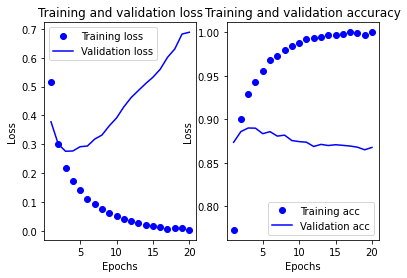

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.subplot(121)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(122)
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

Overfitting when there is more than 4 epochs, thus we rebuild the following


In [ ]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 1s 11ms/step - loss: 0.4412 - accuracy: 0.8253
Epoch 2/4
49/49 [==============================] - 1s 12ms/step - loss: 0.2543 - accuracy: 0.9095
Epoch 3/4
49/49 [==============================] - 1s 11ms/step - loss: 0.1964 - accuracy: 0.9305
Epoch 4/4
782/782 [==============================] - 2s 2ms/step - loss: 0.3414 - accuracy: 0.8681


In [ ]:
print(results)

[0.34137725830078125, 0.868120014667511]


We can test our model on data for predictions

In [ ]:
model.predict(x_test)

array([[0.27753803],
       [0.9999677 ],
       [0.98048455],
       ...,
       [0.18303573],
       [0.12848142],
       [0.7784312 ]], dtype=float32)

## Reuters dataset

Classify texts by topic

In [ ]:
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

2113536/2110848 [==============================] - 0s 0us/step


We can use the same code for decode as previously from the reuters dictionary

We can use the same code for vectorize our data

Vectorizing inputs

In [ ]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In order to vectorize labels, we can use a methode for categorical encoding. It's the same mathode as for input, indeed we represent for labels a 1 per topic and 0 instead. It as the same dimention as number of topics.

In [ ]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

In [ ]:
one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

It is the same as doing the following

In [ ]:
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

Building network and compile

In [ ]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Validation process as previously

In [ ]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [ ]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 0s 20ms/step - loss: 2.6903 - accuracy: 0.5088 - val_loss: 1.8043 - val_accuracy: 0.6230
Epoch 2/20
16/16 [==============================] - 0s 13ms/step - loss: 1.4770 - accuracy: 0.6986 - val_loss: 1.3440 - val_accuracy: 0.7000
Epoch 3/20
16/16 [==============================] - 0s 13ms/step - loss: 1.0854 - accuracy: 0.7680 - val_loss: 1.1417 - val_accuracy: 0.7540
Epoch 4/20
16/16 [==============================] - 0s 12ms/step - loss: 0.8497 - accuracy: 0.8211 - val_loss: 1.0415 - val_accuracy: 0.7880
Epoch 5/20
16/16 [==============================] - 0s 13ms/step - loss: 0.6769 - accuracy: 0.8672 - val_loss: 0.9684 - val_accuracy: 0.7940
Epoch 6/20
16/16 [==============================] - 0s 12ms/step - loss: 0.5390 - accuracy: 0.8918 - val_loss: 0.9664 - val_accuracy: 0.8060
Epoch 7/20
16/16 [==============================] - 0s 13ms/step - loss: 0.4337 - accuracy: 0.9116 - val_loss: 0.8877 - val_accuracy: 0.8210
Epoch 8/20
16

Printing the result

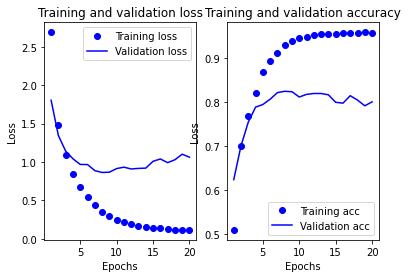

In [ ]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.clf()
plt.subplot(121)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(122)
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

We adjust our model and retrain it

In [ ]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=8,
          batch_size=512,
          validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Epoch 1/8
16/16 [==============================] - 0s 20ms/step - loss: 2.8310 - accuracy: 0.5202 - val_loss: 1.8233 - val_accuracy: 0.6360
Epoch 2/8
16/16 [==============================] - 0s 13ms/step - loss: 1.4362 - accuracy: 0.7127 - val_loss: 1.3087 - val_accuracy: 0.7160
Epoch 3/8
16/16 [==============================] - 0s 13ms/step - loss: 1.0308 - accuracy: 0.7840 - val_loss: 1.1351 - val_accuracy: 0.7630
Epoch 4/8
16/16 [==============================] - 0s 13ms/step - loss: 0.8038 - accuracy: 0.8351 - val_loss: 1.0388 - val_accuracy: 0.7780
Epoch 5/8
16/16 [==============================] - 0s 12ms/step - loss: 0.6447 - accuracy: 0.8633 - val_loss: 0.9997 - val_accuracy: 0.7800
Epoch 6/8
16/16 [==============================] - 0s 13ms/step - loss: 0.5120 - accuracy: 0.8940 - val_loss: 0.9150 - val_accuracy: 0.8170
Epoch 7/8
16/16 [==============================] - 0s 13ms/step - loss: 0.4178 - accuracy: 0.9149 - val_loss: 0.9136 - val_accuracy: 0.8130
Epoch 8/8
71/71 [===

In [ ]:
results

[0.9942442178726196, 0.7880676984786987]

Nearly 80%, pretty good as we now that random is about 19%

Then test on new data


In [ ]:
predictions = model.predict(x_test)

In [ ]:
np.argmax(predictions[0])

3

## Boston housing dataset

Goal is to predict the average price of a house in a given Boston suburb from data like criminality and so on.
The particularity is that every feature as a different scale.

Load dataset

In [ ]:
from keras.datasets import boston_housing

(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

57344/57026 [==============================] - 0s 0us/step


Here are the different features :

1. Per capita crime rate.
2. Proportion of residential land zoned for lots over 25,000 square feet.
3. Proportion of non-retail business acres per town.
4. Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).
5. Nitric oxides concentration (parts per 10 million).
6. Average number of rooms per dwelling.
7. Proportion of owner-occupied units built prior to 1940.
8. Weighted distances to five Boston employment centres.
9. Index of accessibility to radial highways.
10. Full-value property-tax rate per $10,000.
11. Pupil-teacher ratio by town.
12. 1000 * (Bk - 0.63) ** 2 where Bk is the proportion of Black people by town.
13. % lower status of the population.



Preparing inputs

In [ ]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std

test_data -= mean
test_data /= std

For further creations

In [ ]:
from keras import models
from keras import layers

def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu',
                           input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

Here is a new metric : Mean Absolute Error

We can't do as usual for validation process because there is so few data. Solution is K-fold methode. We are spliting the set by K and iterate the validation process over all piece of the dataset while we train the model on the others. As a result :

In [ ]:
import numpy as np

k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []
for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]

    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)

    model = build_model()
    model.fit(partial_train_data, partial_train_targets,
              epochs=num_epochs, batch_size=1, verbose=0)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


We can use the `np.mean(all_scores)` command to get the mean of our result, most reliable mesure

Clean some memory

In [ ]:
from keras import backend as K

K.clear_session()

We modify the previous code to keep a record and increase the number of epochs 

In [ ]:
num_epochs = 500
all_mae_histories = []
for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]

    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)

    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=1, verbose=0)
    mae_history = history.history['val_mae']
    all_mae_histories.append(mae_history)

processing fold # 0
{'loss': [192.9718017578125, 32.02326965332031, 21.918365478515625, 18.694570541381836, 16.553590774536133, 15.62972354888916, 14.256755828857422, 13.96501636505127, 12.41671085357666, 12.788945198059082, 11.98914909362793, 11.290755271911621, 11.417207717895508, 11.038496971130371, 10.940427780151367, 10.61026668548584, 10.421640396118164, 10.187137603759766, 9.972288131713867, 9.36943531036377, 9.338957786560059, 9.37697696685791, 8.786892890930176, 8.917713165283203, 8.82225513458252, 8.729535102844238, 8.607335090637207, 8.084492683410645, 8.173284530639648, 8.106405258178711, 8.294632911682129, 7.779145240783691, 7.855899810791016, 7.191267013549805, 7.735953330993652, 7.484896183013916, 7.569174766540527, 7.5159196853637695, 7.255797386169434, 7.073944091796875, 6.723259925842285, 7.185020923614502, 6.777687072753906, 6.829391002655029, 7.240687847137451, 6.700267314910889, 6.234335422515869, 6.248008728027344, 6.622051239013672, 6.32130765914917, 6.0116791725

Plot the result

In [ ]:
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

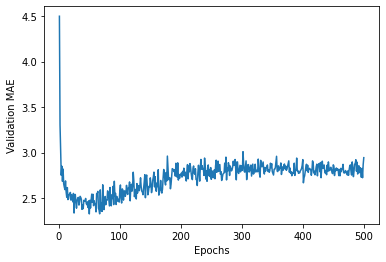

In [ ]:
import matplotlib.pyplot as plt

plt.clf()
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

Smooting the curve and exlude irrevelent points, we get the following

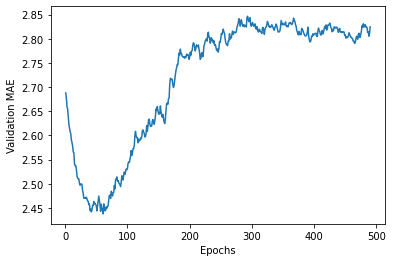

In [ ]:
def smooth_curve(points, factor=0.9):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points

smooth_mae_history = smooth_curve(average_mae_history[10:])

plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

We can thus build our new fresh model

In [ ]:
model = build_model()
model.fit(train_data, train_targets,
          epochs=80, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

4/4 [==============================] - 0s 3ms/step - loss: 17.2889 - mae: 2.5956


In [ ]:
test_mae_score

2.5956013202667236

# Further tries